In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
customer_df= pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer_Lifetime_Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective_To_Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location_Code                  9134 non-null   object 
 11  Marital_Status                 9134 non-null   object 
 12  Monthly_Premium_Auto           9134 non-null   i

In [5]:
customer_df['Effective_To_Date'] =  pd.to_datetime(customer_df['Effective_To_Date'], infer_datetime_format=True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   Customer_Lifetime_Value        9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective_To_Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location_Code                  9134 non-null   object        
 11  Marital_Status   

In [6]:
customer_df.isnull().sum()/customer_df.shape[0]

Customer                         0.0
State                            0.0
Customer_Lifetime_Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective_To_Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location_Code                    0.0
Marital_Status                   0.0
Monthly_Premium_Auto             0.0
Months_Since_Last_Claim          0.0
Months_Since_Policy_Inception    0.0
Number_of_Open_Complaints        0.0
Number_of_Policies               0.0
Policy_Type                      0.0
Policy                           0.0
Renew_Offer_Type                 0.0
Sales_Channel                    0.0
Total_Claim_Amount               0.0
Vehicle_Class                    0.0
Vehicle_Size                     0.0
dtype: float64

In [7]:
##Numerical variables
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


array([[<AxesSubplot:title={'center':'Customer_Lifetime_Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly_Premium_Auto'}>],
       [<AxesSubplot:title={'center':'Months_Since_Last_Claim'}>,
        <AxesSubplot:title={'center':'Months_Since_Policy_Inception'}>,
        <AxesSubplot:title={'center':'Number_of_Open_Complaints'}>],
       [<AxesSubplot:title={'center':'Number_of_Policies'}>,
        <AxesSubplot:title={'center':'Total_Claim_Amount'}>,
        <AxesSubplot:>]], dtype=object)

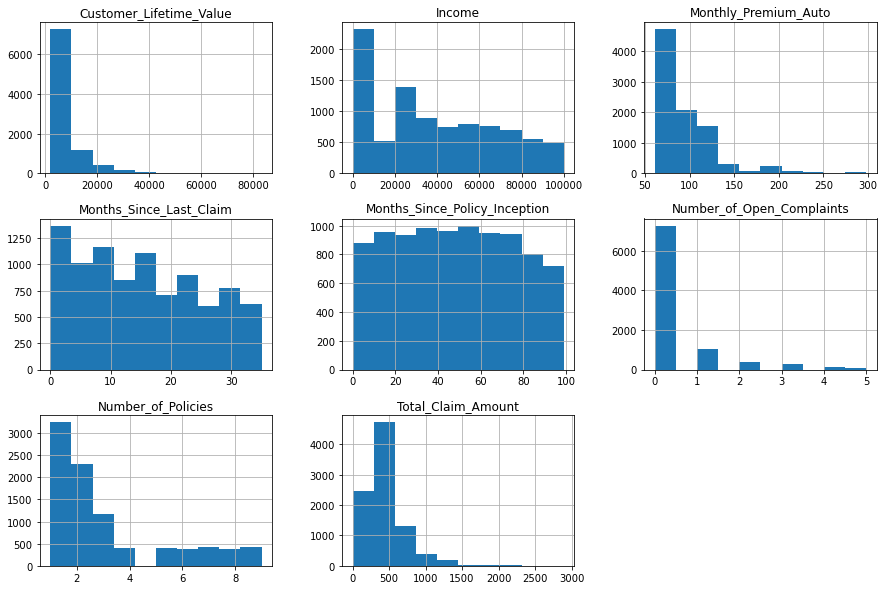

In [26]:
##Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
numericals.hist(figsize = (15, 10))

In [27]:
from sklearn.preprocessing import PowerTransformer

pT = PowerTransformer()
pT.fit(numericals)
numericals_trans = pd.DataFrame(pT.transform(numericals), columns=numericals.columns)

array([[<AxesSubplot:title={'center':'Customer_Lifetime_Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly_Premium_Auto'}>],
       [<AxesSubplot:title={'center':'Months_Since_Last_Claim'}>,
        <AxesSubplot:title={'center':'Months_Since_Policy_Inception'}>,
        <AxesSubplot:title={'center':'Number_of_Open_Complaints'}>],
       [<AxesSubplot:title={'center':'Number_of_Policies'}>,
        <AxesSubplot:title={'center':'Total_Claim_Amount'}>,
        <AxesSubplot:>]], dtype=object)

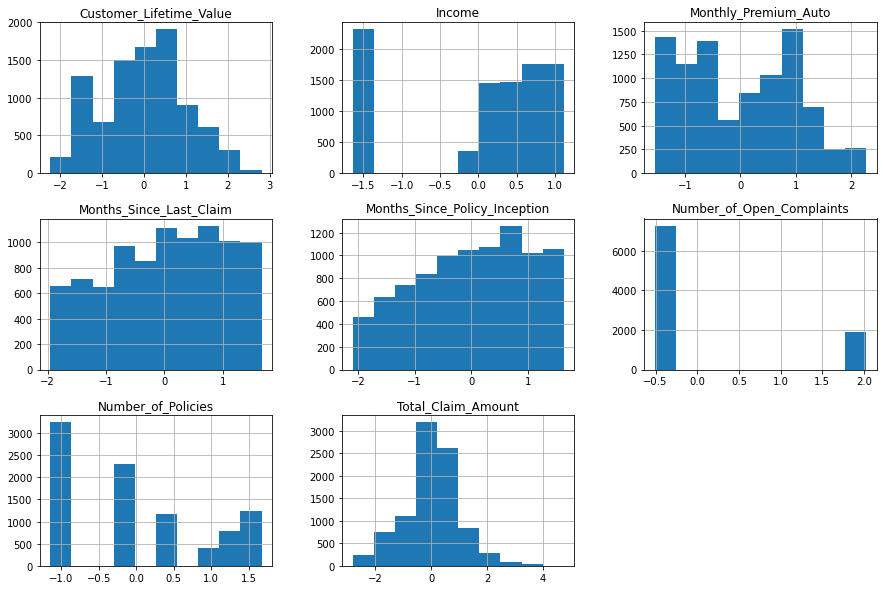

In [28]:
numericals_trans.hist(figsize = (15, 10))

In [29]:
from sklearn.preprocessing import StandardScaler

sS = StandardScaler()
sS.fit(numericals)
numericals_trans = pd.DataFrame(sS.transform(numericals), columns=numericals.columns)

array([[<AxesSubplot:title={'center':'Customer_Lifetime_Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly_Premium_Auto'}>],
       [<AxesSubplot:title={'center':'Months_Since_Last_Claim'}>,
        <AxesSubplot:title={'center':'Months_Since_Policy_Inception'}>,
        <AxesSubplot:title={'center':'Number_of_Open_Complaints'}>],
       [<AxesSubplot:title={'center':'Number_of_Policies'}>,
        <AxesSubplot:title={'center':'Total_Claim_Amount'}>,
        <AxesSubplot:>]], dtype=object)

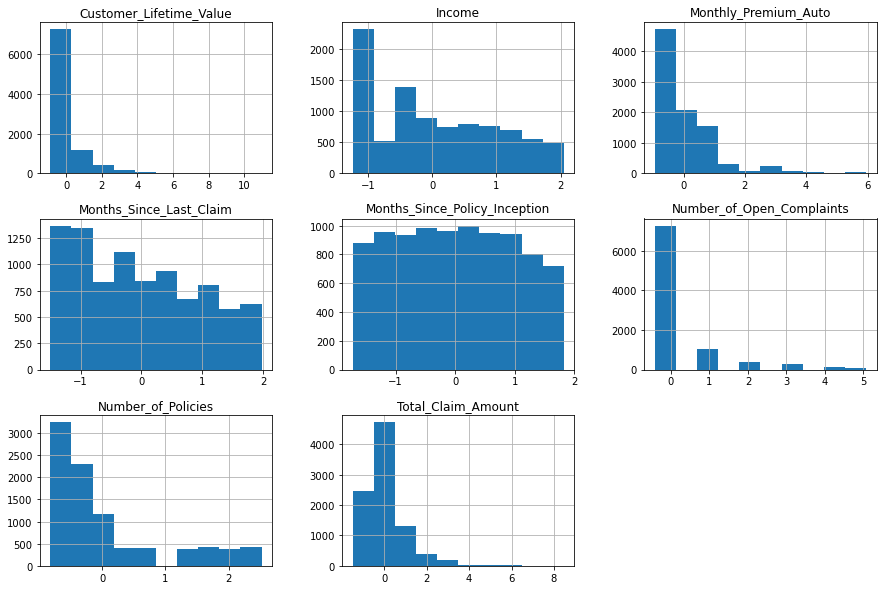

In [30]:
numericals_trans.hist(figsize = (15, 10))